# Coronavirus Government Resopnse Tracker

[Link](https://www.europeandataportal.eu/en/covid-19/stories/track-government-measures-covid-19-oxford-government-response-tracker)

In [1]:
# Import the standard libraries
import pandas as pd
import numpy as np
import json
import requests
# Daytime
from datetime import datetime
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Some Visualization settings
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')
sns.set_style("darkgrid")

## Download data via API

Attention: Not all relevant data is included in the jsonfile. Therefore, this interface is only suitable for recording the corona numbers for each country

In [2]:
# Create API url
url = 'https://covidtrackerapi.bsg.ox.ac.uk/api/v2/stringency/date-range/'
start_date = '2020-01-01'
date = datetime.today().strftime('%Y-%m-%d')
url = url+start_date+'/'+date

# Data download
param = dict()
resp = requests.get(url=url, params=param)
data = resp.json()
#print(json.dumps(data, indent=4))

# Save data as a .json file
with open('OxCGRT.json', 'w') as outfile:
    json.dump(data, outfile)

## Download the data as csv file

In [3]:
url = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv'
df = pd.read_csv(url,sep=",") 
df.head()

,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
0,Aruba,ABW,20200101,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aruba,ABW,20200102,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Aruba,ABW,20200103,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Aruba,ABW,20200104,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aruba,ABW,20200105,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Shape of the dataset
df.shape

(30282, 42)

In [5]:
# Data by country
by_country = df.groupby(by='CountryName')[df.columns[2]].count().sort_values(ascending=False)
by_country

CountryName
Moldova            172
Bolivia            172
Peru               172
South Korea        172
Spain              172
                  ... 
Taiwan             167
Solomon Islands    164
Turkmenistan       160
Latvia             109
Gibraltar           92
Name: Date, Length: 178, dtype: int64

In [6]:
# Number of different countries
len(by_country)

178

In [7]:
# Count the missing values
by_country_na = df.drop('CountryName', 1).isna().groupby(df.CountryName, sort=False).sum().reset_index()
by_country_na.head()

,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
0,Aruba,0.0,0.0,8.0,108.0,8.0,88.0,8.0,121.0,8.0,...,8.0,2.0,8.0,2.0,8.0,2.0,8.0,2.0,8.0,2.0
1,Afghanistan,0.0,0.0,11.0,84.0,11.0,94.0,11.0,71.0,11.0,...,11.0,5.0,11.0,5.0,11.0,5.0,11.0,5.0,11.0,5.0
2,Angola,0.0,0.0,3.0,86.0,3.0,89.0,3.0,89.0,3.0,...,3.0,0.0,3.0,0.0,3.0,0.0,3.0,0.0,15.0,9.0
3,Albania,0.0,0.0,4.0,72.0,4.0,74.0,4.0,72.0,4.0,...,4.0,0.0,4.0,0.0,4.0,0.0,4.0,0.0,4.0,0.0
4,Andorra,0.0,0.0,7.0,93.0,7.0,80.0,7.0,79.0,7.0,...,7.0,1.0,7.0,1.0,8.0,2.0,8.0,2.0,8.0,2.0


In [8]:
# Missing values of a specific country
country_name = 'France' #'Germany'
by_country_na[by_country_na['CountryName']==country_name]

,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
56,France,0.0,0.0,1.0,62.0,1.0,77.0,1.0,73.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
0,France,FRA,20200101,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,France,FRA,20200102,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,France,FRA,20200103,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,France,FRA,20200104,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,France,FRA,20200105,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


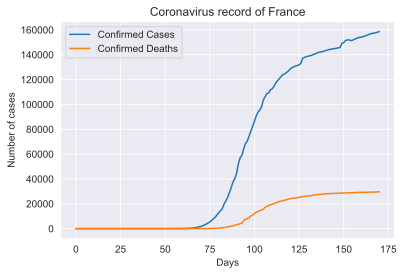

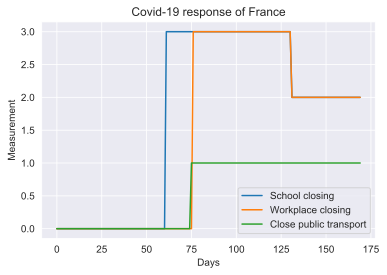

In [9]:
# Data visualization
country_name = 'France'
# Reorder the list
df_country = df[df['CountryName']==country_name].sort_values(by=['Date']).reset_index(drop=True)
display(df_country.head())

# Coronavirus case
#plt.figure(figsize=(8,6))
plt.plot(np.arange(df_country.shape[0]),df_country['ConfirmedCases'],label='Confirmed Cases')
plt.plot(np.arange(df_country.shape[0]),df_country['ConfirmedDeaths'],label='Confirmed Deaths')
plt.legend()
plt.title('Coronavirus record of '+country_name)
plt.ylabel('Number of cases')
plt.xlabel('Days')
plt.show()

# Government response
#plt.figure(figsize=(8,6))
plt.plot(np.arange(df_country.shape[0]),df_country['C1_School closing'],label='School closing')
plt.plot(np.arange(df_country.shape[0]),df_country['C2_Workplace closing'],label='Workplace closing')
plt.plot(np.arange(df_country.shape[0]),df_country['C5_Close public transport'],label='Close public transport')
plt.legend()
plt.title('Covid-19 response of '+country_name)
plt.ylabel('Measurement')
plt.xlabel('Days')
plt.show()

**School cloosing**<br>
0 - no measures<br>
1 - recommend closing<br>
2 - require closing (only some levels or categories, eg just high school, or just public schools)<br>
3 - require closing all levels<br>
Blank - no data

**Workplace closing**<br>
0 - no measures<br>
1 - recommend closing (or recommend work from home)<br>
2 - require closing (or work from home) for some sectors or categories of workers<br>
3 - require closing (or work from home) for all-but-essential workplaces (eg grocery stores, doctors)<br>
Blank - no data

**Close public transport**<br>
0 - no measures<br>
1 - recommend closing (or significantly reduce volume/route/means of transport available)<br>
2 - require closing (or prohibit most citizens from using it)<br>
Blank - no data


# RKI COVID-19 Data

[Link](https://npgeo-corona-npgeo-de.hub.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0)

In [10]:
# Import the standard libraries
import pandas as pd
import numpy as np
import json
import requests

# Daytime
from datetime import datetime

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Some Visualization settings
from IPython.display import set_matplotlib_formats
from matplotlib.dates import DateFormatter
%matplotlib inline
set_matplotlib_formats('svg')
sns.set_style("darkgrid")

In [11]:
url = 'https://opendata.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0.geojson'

# Data download
param = dict()
resp = requests.get(url=url, params=param)
data = resp.json()
#print(json.dumps(data, indent=4))

# Save data as a .json file
with open('RKI_COVID19.json', 'w') as outfile:
    json.dump(data, outfile)

In [12]:
# Load .json file
with open('RKI_COVID19.json') as data_file:    
    data = json.load(data_file)  

In [13]:
# Compile json to dataframe
df = pd.json_normalize(data,'features')
# Drop unnecessary columns
df = df.drop(['type','geometry'],axis=1)
# Rename columns
df.columns = [col.replace('properties.', '') for col in df.columns]
df.head()

,ObjectId,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
0,13365240,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/14 00:00:00,01001,"21.06.2020, 00:00 Uhr",0,-9,2020/03/16 00:00:00,0,1,1,Nicht übermittelt
1,13365241,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/19 00:00:00,01001,"21.06.2020, 00:00 Uhr",0,-9,2020/03/13 00:00:00,0,1,1,Nicht übermittelt
2,13365242,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/19 00:00:00,01001,"21.06.2020, 00:00 Uhr",0,-9,2020/03/16 00:00:00,0,1,1,Nicht übermittelt
3,13365243,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/21 00:00:00,01001,"21.06.2020, 00:00 Uhr",0,-9,2020/03/13 00:00:00,0,1,1,Nicht übermittelt
4,13365244,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/27 00:00:00,01001,"21.06.2020, 00:00 Uhr",0,-9,2020/03/22 00:00:00,0,1,1,Nicht übermittelt


In [14]:
# Clear not used data
print('Elements of column \"Altersgruppe2\": '+ df.Altersgruppe2.unique())
df_clean = df.drop(['ObjectId','Altersgruppe2'],axis=1)

['Elements of column "Altersgruppe2": Nicht übermittelt']


In [15]:
# Shape of the dataset
df_clean.shape

(152938, 16)

In [16]:
# Data per state
by_state = df_clean.groupby(by='Bundesland')[df_clean.columns[2]].count().sort_values(ascending=True)
by_state

Bundesland
Mecklenburg-Vorpommern      732
Bremen                     1264
Sachsen-Anhalt             1579
Saarland                   2158
Schleswig-Holstein         2810
Hamburg                    2867
Thüringen                  2986
Brandenburg                2992
Sachsen                    4576
Rheinland-Pfalz            6029
Berlin                     6968
Hessen                     9314
Niedersachsen             10739
Baden-Württemberg         28481
Nordrhein-Westfalen       32320
Bayern                    37123
Name: Landkreis, dtype: int64

In [17]:
# Count the missing values
by_state_na = df_clean.drop('Bundesland', 1).isna().groupby(df_clean.Bundesland, sort=False).sum().reset_index()

# Missing values of a specific country
state_name = 'Bayern'
#state_name = 'Nordrhein-Westfalen'
by_state_na[by_state_na['Bundesland']==state_name]

,Bundesland,IdBundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn
8,Bayern,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
# Other form to check for missing values
df_clean.isnull().sum()

IdBundesland            0
Bundesland              0
Landkreis               0
Altersgruppe            0
Geschlecht              0
AnzahlFall              0
AnzahlTodesfall         0
Meldedatum              0
IdLandkreis             0
Datenstand              0
NeuerFall               0
NeuerTodesfall          0
Refdatum                0
NeuGenesen              0
AnzahlGenesen           0
IstErkrankungsbeginn    0
dtype: int64

In [19]:
df_clean.Bundesland.unique()

array(['Schleswig-Holstein', 'Hamburg', 'Niedersachsen', 'Bremen',
       'Nordrhein-Westfalen', 'Hessen', 'Rheinland-Pfalz',
       'Baden-Württemberg', 'Bayern', 'Saarland', 'Berlin', 'Brandenburg',
       'Mecklenburg-Vorpommern', 'Sachsen', 'Sachsen-Anhalt', 'Thüringen'],
      dtype=object)

In [20]:
state = df_clean[df_clean.Bundesland == state_name].copy()
len(state)

37123

In [21]:
state.Landkreis.unique()

array(['SK Ingolstadt', 'SK München', 'SK Rosenheim', 'LK Altötting',
       'LK Berchtesgadener Land', 'LK Bad Tölz-Wolfratshausen',
       'LK Dachau', 'LK Ebersberg', 'LK Eichstätt', 'LK Erding',
       'LK Freising', 'LK Fürstenfeldbruck', 'LK Garmisch-Partenkirchen',
       'LK Landsberg a.Lech', 'LK Miesbach', 'LK Mühldorf a.Inn',
       'LK München', 'LK Neuburg-Schrobenhausen',
       'LK Pfaffenhofen a.d.Ilm', 'LK Rosenheim', 'LK Starnberg',
       'LK Traunstein', 'LK Weilheim-Schongau', 'SK Landshut',
       'SK Passau', 'SK Straubing', 'LK Deggendorf',
       'LK Freyung-Grafenau', 'LK Kelheim', 'LK Landshut', 'LK Passau',
       'LK Regen', 'LK Rottal-Inn', 'LK Straubing-Bogen',
       'LK Dingolfing-Landau', 'SK Amberg', 'SK Regensburg',
       'SK Weiden i.d.OPf.', 'LK Amberg-Sulzbach', 'LK Cham',
       'LK Neumarkt i.d.OPf.', 'LK Neustadt a.d.Waldnaab',
       'LK Regensburg', 'LK Schwandorf', 'LK Tirschenreuth', 'SK Bamberg',
       'SK Bayreuth', 'SK Coburg', 'SK Hof

In [22]:
district_name = 'SK München'
district = df_clean[df_clean.Landkreis == district_name].copy()
len(district)

3446

,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,AnzahlGenesen
0,A00-A04,M,53,0,49
1,A00-A04,W,41,0,40
2,A05-A14,M,111,0,102
3,A05-A14,W,111,0,104
4,A05-A14,unbekannt,1,0,0
5,A15-A34,M,1174,2,1108
6,A15-A34,W,1060,0,1030
7,A35-A59,M,1384,8,1346
8,A35-A59,W,1289,2,1271
9,A60-A79,M,493,53,434


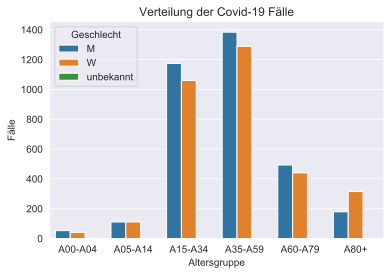

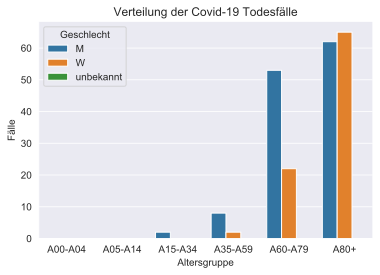

In [23]:
num_cases = district.groupby(['Altersgruppe','Geschlecht']).sum().reset_index()
num_cases = num_cases.drop(['IdBundesland','NeuerFall','NeuerTodesfall','NeuGenesen','IstErkrankungsbeginn'],axis=1)
# Plot "Verteilung der Covid-19 Fälle"
fig, ax1 = plt.subplots()
tidy = df.melt(id_vars='Altersgruppe').rename(columns=str.title)
sns.barplot(x='Altersgruppe', y='AnzahlFall', hue='Geschlecht', data=num_cases, ax=ax1)
plt.ylabel('Fälle')
plt.title('Verteilung der Covid-19 Fälle')
sns.despine(fig)
# Plot "Verteilung der Covid-19 Fälle"
fig, ax1 = plt.subplots()
tidy = df.melt(id_vars='Altersgruppe').rename(columns=str.title)
sns.barplot(x='Altersgruppe', y='AnzahlTodesfall', hue='Geschlecht', data=num_cases, ax=ax1)
plt.ylabel('Fälle')
plt.title('Verteilung der Covid-19 Todesfälle')
sns.despine(fig)
num_cases

In [24]:
district = district.sort_values(by=['Refdatum'])
# Save cases of one district in a csv file
file_name = 'COVID-19 Cases '+district_name+'.csv'
district.drop(['IdBundesland','Bundesland','Landkreis','IdLandkreis'],axis=1).to_csv(file_name, index=False, encoding='utf-8')

In [25]:
district_plot = district.drop(['IdBundesland','Bundesland','Landkreis','Meldedatum','IdLandkreis','Datenstand','NeuerFall','NeuerTodesfall','NeuGenesen','IstErkrankungsbeginn'],axis=1)
district_plot['Refdatum'] = pd.to_datetime(district_plot['Refdatum'])
district_plot = district_plot.groupby(by=['Refdatum']).sum().cumsum()

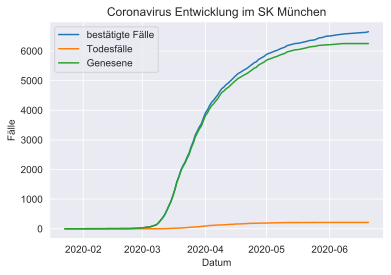

In [26]:
fig, ax1 = plt.subplots()
plt.plot(district_plot.AnzahlFall,label='bestätigte Fälle')
plt.plot(district_plot.AnzahlTodesfall,label='Todesfälle')
plt.plot(district_plot.AnzahlGenesen,label='Genesene')
plt.legend()
date_form = DateFormatter("%Y-%m")
ax1.set(xlabel="Datum",
       ylabel="Fälle",
       title="Coronavirus Entwicklung im "+district_name)
ax1.xaxis.set_major_formatter(date_form)
#plt.xticks(rotation=18)
plt.show()

# TUM Fusionbase

[Link](https://public.fusionbase.io/explore/covid19-germany/data)<br>
API-Key: ffe80dd5-5b8c-4acc-bb26-655f8cb1198c

In [27]:
# Import the standard libraries
import pandas as pd
import numpy as np
import json
import requests

# Daytime
from datetime import datetime

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Some Visualization settings
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')
sns.set_style("darkgrid")

In [28]:
url = "https://api.public.fusionbase.io/cases/download/csv/"

payload = {}
headers = {
  'X-API-Key': 'ffe80dd5-5b8c-4acc-bb26-655f8cb1198c'
}

response = requests.request("GET", url, headers=headers, data = payload)

# Save data to csv-file
with open('COVID-19 Cases Germany.csv','wb') as file:
    #for line in text:
    file.write(response.text.encode('utf8'))

In [29]:
# Load csv-file
df = pd.read_csv('COVID-19 Cases Germany.csv')

# Clear not used data
df_clean = df
#df_clean = df.drop(['location_label','fb_id','bundesland_ags','kreis_ags','kreis_nuts'],axis=1)
df_clean.head()

,fb_id,location_label,cases,relative_case_changes,cases_per_population,cases_per_100k,deaths,relative_death_changes,deaths_per_population,deaths_per_100k,population,bundesland_name,bundesland_ags,kreis_name,kreis_ags,kreis_nuts,publication_datetime,fb_datetime
0,a0e80a003fcdf3d2506d9dceb2bbe779,Dithmarschen,70,6.0,0.000525,52.5486,4.0,0.0,0.000030,3.0028,133210,Schleswig-Holstein,1,Dithmarschen,1051,DEF05,2020-06-19 00:00:00,2020-06-19 11:26:31
1,798da434183fae440a0369d32295d74f,Flensburg,46,2.0,0.000514,51.3944,3.0,0.0,0.000034,3.3518,89504,Schleswig-Holstein,1,Flensburg,1001,DEF01,2020-06-19 00:00:00,2020-06-19 11:26:31
2,8c6ed7ac5b485c60b3d3009dcd06ee30,Herzogtum Lauenburg,266,1.0,0.001348,134.8447,16.0,0.0,0.000081,8.1110,197264,Schleswig-Holstein,1,Herzogtum Lauenburg,1053,DEF06,2020-06-19 00:00:00,2020-06-19 11:26:31
3,5a8c612d031e57d0b16fb8f9a939f884,Kiel,281,2.0,0.001135,113.5133,10.0,1.0,0.000040,4.0396,247548,Schleswig-Holstein,1,Kiel,1002,DEF02,2020-06-19 00:00:00,2020-06-19 11:26:31
4,c4b14bff4f81226d183264d490d4bb44,Lübeck,166,-3.0,0.000764,76.4280,1.0,0.0,0.000005,0.4604,217198,Schleswig-Holstein,1,Lübeck,1003,DEF03,2020-06-19 00:00:00,2020-06-19 11:26:31


In [30]:
# Shape of the dataset
df_clean.shape

(24875, 18)

In [31]:
# Other form to check for missing values
df_clean.isna().sum()

fb_id                         0
location_label                0
cases                         0
relative_case_changes       318
cases_per_population          0
cases_per_100k                0
deaths                    15175
relative_death_changes    15840
deaths_per_population     15175
deaths_per_100k           15175
population                    0
bundesland_name               0
bundesland_ags                0
kreis_name                    0
kreis_ags                     0
kreis_nuts                    0
publication_datetime          2
fb_datetime                   0
dtype: int64

In [32]:
# Data per state
by_state = df_clean.groupby(by = 'bundesland_name')[df_clean.columns[2]].count().sort_values(ascending=True)
by_state

bundesland_name
Hamburg                     79
Berlin                      82
Bremen                     126
Mecklenburg-Vorpommern     268
Saarland                   399
Sachsen-Anhalt             549
Schleswig-Holstein         661
Sachsen                    791
Brandenburg                882
Thüringen                  966
Hessen                    1736
Rheinland-Pfalz           1818
Niedersachsen             2438
Baden-Württemberg         3224
Nordrhein-Westfalen       4286
Bayern                    6570
Name: cases, dtype: int64

In [33]:
# Count the missing values
by_state_na = df_clean.drop('bundesland_name', 1).isna().groupby(df_clean.bundesland_name, sort=False).sum().reset_index()

# Missing values of a specific country
state_name = 'Bayern'
#state_name = 'Nordrhein-Westfalen'
by_state_na[by_state_na['bundesland_name']==state_name]

,bundesland_name,fb_id,location_label,cases,relative_case_changes,cases_per_population,cases_per_100k,deaths,relative_death_changes,deaths_per_population,deaths_per_100k,population,bundesland_ags,kreis_name,kreis_ags,kreis_nuts,publication_datetime,fb_datetime
8,Bayern,0.0,0.0,0.0,90.0,0.0,0.0,4132.0,4300.0,4132.0,4132.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [34]:
state = df_clean[df_clean.bundesland_name == state_name].copy()
len(state)

6570

In [35]:
state.kreis_name.unique()

array(['Aichach-Friedberg', 'Altötting', 'Amberg', 'Amberg-Sulzbach',
       'Ansbach', 'Aschaffenburg', 'Augsburg', 'Bad Kissingen',
       'Bad Tölz-Wolfratshausen', 'Bamberg', 'Bayreuth',
       'Berchtesgadener Land', 'Cham', 'Coburg', 'Dachau', 'Deggendorf',
       'Dillingen a.d. Donau', 'Dingolfing-Landau', 'Donau-Ries',
       'Ebersberg', 'Eichstätt', 'Erding', 'Erlangen',
       'Erlangen-Höchstadt', 'Forchheim', 'Freising', 'Freyung-Grafenau',
       'Fürstenfeldbruck', 'Fürth', 'Garmisch-Partenkirchen', 'Günzburg',
       'Haßberge', 'Hof', 'Ingolstadt', 'Kaufbeuren', 'Kelheim',
       'Kempten (Allgäu)', 'Kitzingen', 'Kronach', 'Kulmbach',
       'Landsberg am Lech', 'Landshut', 'Lichtenfels',
       'Lindau (Bodensee)', 'Main-Spessart', 'Memmingen', 'Miesbach',
       'Miltenberg', 'Mühldorf a. Inn', 'München', 'Neu-Ulm',
       'Neuburg-Schrobenhausen', 'Neumarkt i.d. OPf.',
       'Neustadt a.d. Aisch-Bad Windsheim', 'Neustadt a.d. Waldnaab',
       'Nürnberg', 'Nürnber

In [36]:
district_name = 'München'
district_code = 9184
#district = df_clean[df_clean.kreis_name == district_name].copy()
district = df_clean[df_clean.kreis_ags == district_code].copy()
len(district)

109

In [37]:
district.sort_values(by='fb_datetime').reset_index(drop=True)
district.groupby(['fb_datetime']).max()

,fb_id,location_label,cases,relative_case_changes,cases_per_population,cases_per_100k,deaths,relative_death_changes,deaths_per_population,deaths_per_100k,population,bundesland_name,bundesland_ags,kreis_name,kreis_ags,kreis_nuts,publication_datetime
fb_datetime,,,,,,,,,,,,,,,,,
2020-03-19 11:00:00,e83d51efc6454e5b5315c52928a2a292,München,321,NaN,0.000920,92.0111,NaN,NaN,NaN,NaN,348871,Bayern,9,München,9184,DE21H,2020-03-19 11:00:00
2020-03-20 10:00:00,010530b5cd40478ecea0bd95c198e3d4,München,187,-134.0,0.000536,53.6015,NaN,NaN,NaN,NaN,348871,Bayern,9,München,9184,DE21H,2020-03-20 10:00:00
2020-03-21 10:00:00,746aa510ebd53b8f91b73e3537927f63,München,219,32.0,0.000628,62.7739,NaN,NaN,NaN,NaN,348871,Bayern,9,München,9184,DE21H,2020-03-21 10:00:00
2020-03-22 10:00:00,a209149e3193981614b058a20fc82260,München,591,372.0,0.001694,169.4036,NaN,NaN,NaN,NaN,348871,Bayern,9,München,9184,DE21H,2020-03-22 10:00:00
2020-03-23 10:00:00,ba24586eb92637e68c64e379ec2e4293,München,1237,991.0,0.003546,354.5723,NaN,NaN,NaN,NaN,348871,Bayern,9,München,9184,DE21H,2020-03-23 10:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-13 17:00:21,c6ac6ee678740e58a8a462ce5ddbf02f,München,1404,7.0,0.004024,402.4410,83.0,1.0,0.000238,23.791,348871,Bayern,9,München,9184,DE21H,2020-06-13 00:00:00
2020-06-15 13:01:43,027cd79eb1dd86d58eab4a240a2b6609,München,1405,1.0,0.004027,402.7277,83.0,0.0,0.000238,23.791,348871,Bayern,9,München,9184,DE21H,2020-06-15 10:00:00
2020-06-17 08:39:59,efce5a21de817df9e410eba6ab6e8f8b,München,1406,1.0,0.004030,403.0143,83.0,0.0,0.000238,23.791,348871,Bayern,9,München,9184,DE21H,2020-06-16 10:00:00


# JHU

[Link](https://datahub.io/core/covid-19)

In [38]:
# Import the standard libraries
import pandas as pd
import numpy as np
import json
import requests

# Daytime
from datetime import datetime

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Some Visualization settings
from IPython.display import set_matplotlib_formats
from matplotlib.dates import DateFormatter
%matplotlib inline
set_matplotlib_formats('svg')
sns.set_style("darkgrid")

In [39]:
url = 'https://datahub.io/core/covid-19/r/time-series-19-covid-combined.csv'

# Data download
df = pd.read_csv(url)

# Save data as a .json file
file_name = 'time-series-19-covid-combined_csv.csv'
df.to_csv(file_name,index=False)

In [40]:
# Load csv file
file_name = 'time-series-19-covid-combined_csv.csv'
df = pd.read_csv(file_name)

In [41]:
# Show head of data
df.head()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
1,2020-01-23,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
2,2020-01-24,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
3,2020-01-25,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
4,2020-01-26,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0


In [42]:
# Shape of the dataset
df.shape

(40317, 8)

In [43]:
# Data per state
country = df.groupby(by=['Country/Region'])[df.columns[2]].count().sort_values(ascending=True)
by_country

CountryName
Moldova            172
Bolivia            172
Peru               172
South Korea        172
Spain              172
                  ... 
Taiwan             167
Solomon Islands    164
Turkmenistan       160
Latvia             109
Gibraltar           92
Name: Date, Length: 178, dtype: int64

In [44]:
# Number of different countries
len(by_country)

178

In [45]:
# Count the missing values
by_country_na = df.drop('Country/Region', 1).isna().groupby(df['Country/Region'], sort=False).sum().reset_index()
by_country_na.head()

,Country/Region,Date,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,Afghanistan,0.0,151.0,0.0,0.0,0.0,0.0,0.0
1,Albania,0.0,151.0,0.0,0.0,0.0,0.0,0.0
2,Algeria,0.0,151.0,0.0,0.0,0.0,0.0,0.0
3,Andorra,0.0,151.0,0.0,0.0,0.0,0.0,0.0
4,Angola,0.0,151.0,0.0,0.0,0.0,0.0,0.0


In [46]:
# Missing values of a specific country
country_name = 'France' #'Germany'
display(by_country_na[by_country_na['Country/Region']==country_name])
print(len)

,Country/Region,Date,Province/State,Lat,Long,Confirmed,Recovered,Deaths
62,France,0.0,151.0,0.0,0.0,0.0,0.0,0.0


<built-in function len>


In [47]:
# Data visualization
country_name = 'France'
# Reorder the list
df_country = df[df['Country/Region']==country_name].sort_values(by=['Date']).reset_index(drop=True)
display(df_country.head())

# Coronavirus case
#fig, ax1 = plt.subplots()
#plt.plot(np.arange(df_country.shape[0]),df_country['Confirmed'],label='Confirmed Cases')
#plt.plot(np.arange(df_country.shape[0]),df_country['Deaths'],label='Confirmed Deaths')
#plt.plot(np.arange(df_country.shape[0]),df_country['Recovered'],label='Recovered')
#plt.legend()
#plt.title('Coronavirus record of '+country_name)
#plt.ylabel('Number of cases')
#plt.xlabel('Days')
#plt.show()




,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,France,NaN,46.2276,2.2137,0.0,0.0,0.0
1,2020-01-22,France,Saint Barthelemy,17.9000,-62.8333,0.0,0.0,0.0
2,2020-01-22,France,Guadeloupe,16.2500,-61.5833,0.0,0.0,0.0
3,2020-01-22,France,French Polynesia,-17.6797,149.4068,0.0,0.0,0.0
4,2020-01-22,France,Saint Pierre and Miquelon,46.8852,-56.3159,0.0,0.0,0.0


# München Kultur und Freizeit

[Link](https://www.muenchen.de/rathaus/Stadtinfos/Statistik/News/Corona-Sonderseite/Kultur.html)

In [48]:
url = 'https://www.mstatistik-muenchen.de/monatszahlenmonitoring/export/xlsx/mzm_export_alle_monatszahlen.xlsx'
df = pd.ExcelFile(url)
df.sheet_names

['INHALTSÜBERSICHT',
 'ARBEITSMARKT',
 'BAUEN',
 'BEVÖLKERUNG',
 'EINBÜRGERUNGEN',
 'FEUERWEHR MÜNCHEN',
 'FLUGVERKEHR',
 'FREIZEIT',
 'KFZ-Bestand',
 'KFZ-Neuzulassungen',
 'KINOS',
 'MUSEEN',
 'ORCHESTER',
 'SOZIALE LEISTUNGEN',
 'THEATER',
 'TOURISMUS',
 'VERKEHRSUNFÄLLE',
 'WIRTSCHAFT',
 'WITTERUNG',
 'IMPRESSUM']

## Freizeit

In [49]:
url = 'https://www.mstatistik-muenchen.de/monatszahlenmonitoring/export/xlsx/mzm_export_alle_monatszahlen.xlsx'
df = pd.read_excel(url,sheet_name='FREIZEIT')
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Besucher*innen,Außenanlagen Olympiapark (Veranstaltungen),2020,202001,7727.0,3360.0,-62.90,129.97,77709.0
1,Besucher*innen,Außenanlagen Olympiapark (Veranstaltungen),2020,202002,16770.0,12290.0,117.03,36.45,78082.0
2,Besucher*innen,Außenanlagen Olympiapark (Veranstaltungen),2020,202003,1290.0,17580.0,-92.31,-92.66,76725.0
3,Besucher*innen,Außenanlagen Olympiapark (Veranstaltungen),2020,202004,0.0,52400.0,-100.00,-100.00,NaN
4,Besucher*innen,Außenanlagen Olympiapark (Veranstaltungen),2020,202005,0.0,101080.0,NaN,-100.00,NaN


In [50]:
# Clear not used data
df_clean = df
# Shape of the dataset
print(df_clean.shape)
# Different places for leisure activities
df_clean.AUSPRAEGUNG.unique()

(1715, 9)


array(['Außenanlagen Olympiapark (Veranstaltungen)',
       'Kleine Olympiahalle', 'Olympia-Eissportzentrum', 'Olympiahalle',
       'Olympiastadion', 'Olympiaturm', 'Tierpark Hellabrunn'],
      dtype=object)

In [51]:
# Check for missing values
df_clean.isnull().sum()

MONATSZAHL                          0
AUSPRAEGUNG                         0
JAHR                                0
MONAT                               0
WERT                              124
VORJAHRESWERT                     205
VERAEND_VORMONAT_PROZENT          190
VERAEND_VORJAHRESMONAT_PROZENT    248
ZWOELF_MONATE_MITTELWERT          138
dtype: int64

In [52]:
# Check for missung values in 2020
print(df_clean[df_clean.JAHR == 2020].copy().isnull().sum())
print("Number of values for 2020:",len(df_clean[df_clean.JAHR == 2020].copy()))

MONATSZAHL                         0
AUSPRAEGUNG                        0
JAHR                               0
MONAT                              0
WERT                               0
VORJAHRESWERT                      1
VERAEND_VORMONAT_PROZENT           9
VERAEND_VORJAHRESMONAT_PROZENT     1
ZWOELF_MONATE_MITTELWERT          14
dtype: int64
Number of values for 2020: 35


In [53]:
# Change format of month column
for index in df_clean.index:
    item = str(df_clean.MONAT.loc[index])
    df_clean.MONAT.loc[index] = item[:4]+'-'+item[-2:]
df_clean['MONAT'] = pd.to_datetime(df_clean['MONAT'])

C:\Users\steph\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


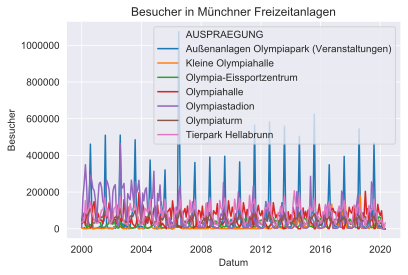

In [54]:
fig, ax1 = plt.subplots()
tidy = df.melt(id_vars='AUSPRAEGUNG').rename(columns=str.title)
sns.lineplot(x='MONAT',y='WERT',hue='AUSPRAEGUNG',data=df_clean,ax=ax1)
ax1.set(xlabel="Datum",
       ylabel="Besucher",
       title="Besucher in Münchner Freizeitanlagen")
sns.despine(fig)

## Kinos

In [55]:
url = 'https://www.mstatistik-muenchen.de/monatszahlenmonitoring/export/xlsx/mzm_export_alle_monatszahlen.xlsx'
df = pd.read_excel(url,sheet_name='KINOS')
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Besucher*innen,insgesamt,2019,201901,327834,352912.0,-4.10,-7.11,286106
1,Besucher*innen,insgesamt,2019,201902,279789,341482.0,-14.66,-18.07,280965
2,Besucher*innen,insgesamt,2019,201903,316633,339001.0,13.17,-6.60,279101
3,Besucher*innen,insgesamt,2019,201904,308885,207462.0,-2.45,48.89,287553
4,Besucher*innen,insgesamt,2019,201905,289810,251870.0,-6.18,15.06,290714


In [56]:
# Clear not used data
df_clean = df
# Shape of the dataset
print(df_clean.shape)
# Different places for leisure activities
df_clean.AUSPRAEGUNG.unique()

(240, 9)


array(['insgesamt'], dtype=object)

In [57]:
# Check for missing values
df_clean.isnull().sum()

MONATSZAHL                         0
AUSPRAEGUNG                        0
JAHR                               0
MONAT                              0
WERT                               0
VORJAHRESWERT                     12
VERAEND_VORMONAT_PROZENT           1
VERAEND_VORJAHRESMONAT_PROZENT    12
ZWOELF_MONATE_MITTELWERT           0
dtype: int64

In [58]:
# Check for missung values in 2020
print(df_clean[df_clean.JAHR == 2020].copy().isnull().sum())
print("Number of values for 2020:",len(df_clean[df_clean.JAHR == 2020].copy()))

MONATSZAHL                        0
AUSPRAEGUNG                       0
JAHR                              0
MONAT                             0
WERT                              0
VORJAHRESWERT                     0
VERAEND_VORMONAT_PROZENT          0
VERAEND_VORJAHRESMONAT_PROZENT    0
ZWOELF_MONATE_MITTELWERT          0
dtype: int64
Number of values for 2020: 0


In [59]:
# Change format of month column
for index in df_clean.index:
    item = str(df_clean.MONAT.loc[index])
    df_clean.MONAT.loc[index] = item[:4]+'-'+item[-2:]
df_clean['MONAT'] = pd.to_datetime(df_clean['MONAT'])

C:\Users\steph\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


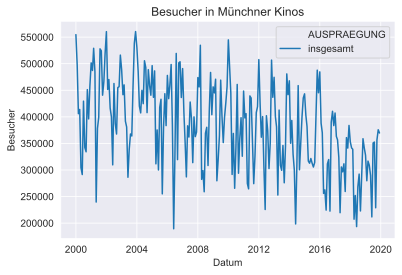

In [60]:
fig, ax1 = plt.subplots()
tidy = df.melt(id_vars='AUSPRAEGUNG').rename(columns=str.title)
sns.lineplot(x='MONAT',y='WERT',hue='AUSPRAEGUNG',data=df_clean,ax=ax1)
ax1.set(xlabel="Datum",
       ylabel="Besucher",
       title="Besucher in Münchner Kinos")
sns.despine(fig)

## Museen

In [61]:
url = 'https://www.mstatistik-muenchen.de/monatszahlenmonitoring/export/xlsx/mzm_export_alle_monatszahlen.xlsx'
df = pd.read_excel(url,sheet_name='MUSEEN')
#df = df.sort_values(by='MONAT')
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Besucher*innen,Alte Pinakothek,2016,201601,16098.0,54261.0,4.91,-70.33,17853.0
1,Besucher*innen,Alte Pinakothek,2016,201602,12462.0,28355.0,-22.59,-56.05,16529.0
2,Besucher*innen,Alte Pinakothek,2016,201603,17194.0,12086.0,37.97,42.26,16955.0
3,Besucher*innen,Alte Pinakothek,2016,201604,15918.0,12749.0,-7.42,24.86,17219.0
4,Besucher*innen,Alte Pinakothek,2016,201605,15412.0,17578.0,-3.18,-12.32,17038.0


In [62]:
# Clear not used data
df_clean = df
# Shape of the dataset
print(df_clean.shape)
# Different places for leisure activities
df_clean.AUSPRAEGUNG.unique()

(2127, 9)


array(['Alte Pinakothek', 'Bayerisches Nationalmuseum',
       'Deutsches Museum - Museumsinsel',
       'Deutsches Museum - Verkehrszentrum', 'Münchner Stadtmuseum',
       'Museum Brandhorst', 'Museum Mensch und Natur', 'Neue Pinakothek',
       'Pinakothek der Moderne', 'Schackgalerie',
       'Städtische Galerie im Lenbachhaus'], dtype=object)

In [63]:
# Check for missing values
df_clean.isnull().sum()

MONATSZAHL                          0
AUSPRAEGUNG                         0
JAHR                                0
MONAT                               0
WERT                               27
VORJAHRESWERT                     153
VERAEND_VORMONAT_PROZENT           44
VERAEND_VORJAHRESMONAT_PROZENT    180
ZWOELF_MONATE_MITTELWERT           27
dtype: int64

In [64]:
# Check for missung values in 2020
print(df_clean[df_clean.JAHR == 2020].copy().isnull().sum())
print("Number of values for 2020:",len(df_clean[df_clean.JAHR == 2020].copy()))

MONATSZAHL                        0
AUSPRAEGUNG                       0
JAHR                              0
MONAT                             0
WERT                              6
VORJAHRESWERT                     0
VERAEND_VORMONAT_PROZENT          6
VERAEND_VORJAHRESMONAT_PROZENT    6
ZWOELF_MONATE_MITTELWERT          6
dtype: int64
Number of values for 2020: 23


In [65]:
# Change format of month column
for index in df_clean.index:
    item = str(df_clean.MONAT.loc[index])
    df_clean.MONAT.loc[index] = item[:4]+'-'+item[-2:]
df_clean['MONAT'] = pd.to_datetime(df_clean['MONAT'])

C:\Users\steph\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


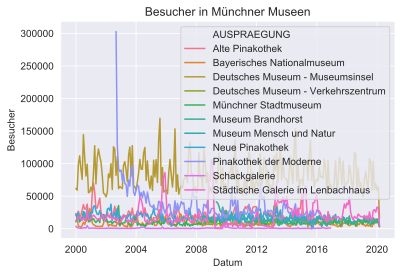

In [66]:
fig, ax1 = plt.subplots()
tidy = df.melt(id_vars='AUSPRAEGUNG').rename(columns=str.title)
sns.lineplot(x='MONAT',y='WERT',hue='AUSPRAEGUNG',data=df_clean,ax=ax1)
ax1.set(xlabel="Datum",
       ylabel="Besucher",
       title="Besucher in Münchner Museen")
sns.despine(fig)

## Orchester

In [67]:
url = 'https://www.mstatistik-muenchen.de/monatszahlenmonitoring/export/xlsx/mzm_export_alle_monatszahlen.xlsx'
df = pd.read_excel(url,sheet_name='ORCHESTER')
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Platzausnutzung,Bayerisches Staatsorchester,2020,202001,98.4,96.8,1.76,1.65,85.0
1,Platzausnutzung,Bayerisches Staatsorchester,2020,202002,96.6,98.9,-1.83,-2.33,85.0
2,Platzausnutzung,Bayerisches Staatsorchester,2020,202003,NaN,0.0,NaN,NaN,NaN
3,Platzausnutzung,Bayerisches Staatsorchester,2020,202004,NaN,92.3,NaN,NaN,NaN
4,Platzausnutzung,Bayerisches Staatsorchester,2020,202005,NaN,87.1,NaN,NaN,NaN


In [68]:
# Clear not used data
df_clean = df
# Shape of the dataset
print(df_clean.shape)
# Different places for leisure activities
df_clean.AUSPRAEGUNG.unique()

(1470, 9)


array(['Bayerisches Staatsorchester', 'Münchner Philharmoniker'],
      dtype=object)

In [69]:
# Check for missing values
df_clean.isnull().sum()

MONATSZAHL                          0
AUSPRAEGUNG                         0
JAHR                                0
MONAT                               0
WERT                              189
VORJAHRESWERT                     237
VERAEND_VORMONAT_PROZENT          339
VERAEND_VORJAHRESMONAT_PROZENT    297
ZWOELF_MONATE_MITTELWERT          192
dtype: int64

In [70]:
# Check for missung values in 2020
print(df_clean[df_clean.JAHR == 2020].copy().isnull().sum())
print("Number of values for 2020:",len(df_clean[df_clean.JAHR == 2020].copy()))

MONATSZAHL                         0
AUSPRAEGUNG                        0
JAHR                               0
MONAT                              0
WERT                              18
VORJAHRESWERT                      0
VERAEND_VORMONAT_PROZENT          18
VERAEND_VORJAHRESMONAT_PROZENT    18
ZWOELF_MONATE_MITTELWERT          18
dtype: int64
Number of values for 2020: 30


In [71]:
# Change format of month column
for index in df_clean.index:
    item = str(df_clean.MONAT.loc[index])
    df_clean.MONAT.loc[index] = item[:4]+'-'+item[-2:]
df_clean['MONAT'] = pd.to_datetime(df_clean['MONAT'])

C:\Users\steph\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


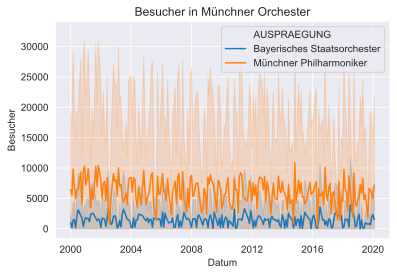

In [72]:
fig, ax1 = plt.subplots()
tidy = df.melt(id_vars='AUSPRAEGUNG').rename(columns=str.title)
sns.lineplot(x='MONAT',y='WERT',hue='AUSPRAEGUNG',data=df_clean,ax=ax1)
ax1.set(xlabel="Datum",
       ylabel="Besucher",
       title="Besucher in Münchner Orchester")
sns.despine(fig)

## Theater

In [73]:
url = 'https://www.mstatistik-muenchen.de/monatszahlenmonitoring/export/xlsx/mzm_export_alle_monatszahlen.xlsx'
df = pd.read_excel(url,sheet_name='THEATER')
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Platzausnutzung,Münchner Kammerspiele,2020,202001,85.5,63.6,4.14,34.43,65.0
1,Platzausnutzung,Münchner Kammerspiele,2020,202002,83.9,58.8,-1.87,42.69,68.0
2,Platzausnutzung,Münchner Kammerspiele,2020,202003,84.7,70.8,0.95,19.63,69.0
3,Platzausnutzung,Münchner Kammerspiele,2020,202004,NaN,64.0,NaN,NaN,NaN
4,Platzausnutzung,Münchner Kammerspiele,2020,202005,NaN,55.1,NaN,NaN,NaN


In [74]:
# Clear not used data
df_clean = df
# Shape of the dataset
print(df_clean.shape)
# Different places for leisure activities
df_clean.AUSPRAEGUNG.unique()

(4224, 9)


array(['Münchner Kammerspiele', 'Nationaltheater',
       'Prinzregententheater (Großes Haus)', 'Residenztheater',
       'Schauburg - Theater für junges Publikum',
       'Theater am Gärtnerplatz'], dtype=object)

In [75]:
# Check for missing values
df_clean.isnull().sum()

MONATSZAHL                          0
AUSPRAEGUNG                         0
JAHR                                0
MONAT                               0
WERT                              631
VORJAHRESWERT                     781
VERAEND_VORMONAT_PROZENT          947
VERAEND_VORJAHRESMONAT_PROZENT    902
ZWOELF_MONATE_MITTELWERT          634
dtype: int64

In [76]:
# Check for missung values in 2020
print(df_clean[df_clean.JAHR == 2020].copy().isnull().sum())
print("Number of values for 2020:",len(df_clean[df_clean.JAHR == 2020].copy()))

MONATSZAHL                         0
AUSPRAEGUNG                        0
JAHR                               0
MONAT                              0
WERT                              36
VORJAHRESWERT                      0
VERAEND_VORMONAT_PROZENT          36
VERAEND_VORJAHRESMONAT_PROZENT    36
ZWOELF_MONATE_MITTELWERT          36
dtype: int64
Number of values for 2020: 90


In [77]:
# Change format of month column
for index in df_clean.index:
    item = str(df_clean.MONAT.loc[index])
    df_clean.MONAT.loc[index] = item[:4]+'-'+item[-2:]
df_clean['MONAT'] = pd.to_datetime(df_clean['MONAT'])

C:\Users\steph\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


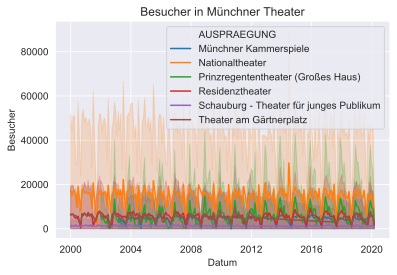

In [78]:
fig, ax1 = plt.subplots()
tidy = df.melt(id_vars='AUSPRAEGUNG').rename(columns=str.title)
sns.lineplot(x='MONAT',y='WERT',hue='AUSPRAEGUNG',data=df_clean,ax=ax1)
ax1.set(xlabel="Datum",
       ylabel="Besucher",
       title="Besucher in Münchner Theater")
sns.despine(fig)

## Tourismus

In [79]:
url = 'https://www.mstatistik-muenchen.de/monatszahlenmonitoring/export/xlsx/mzm_export_alle_monatszahlen.xlsx'
df = pd.read_excel(url,sheet_name='TOURISMUS')
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Gäste,Ausland,2020,202001,243174,237104.0,-28.22,2.56,328039
1,Gäste,Ausland,2020,202002,223106,240175.0,-8.25,-7.11,326617
2,Gäste,Ausland,2019,201901,237104,234150.0,-25.49,1.26,312826
3,Gäste,Ausland,2019,201902,240175,216399.0,1.30,10.99,314807
4,Gäste,Ausland,2019,201903,263418,263523.0,9.68,-0.04,314798


In [80]:
# Clear not used data
df_clean = df
# Shape of the dataset
print(df_clean.shape)
# Different places for leisure activities
df_clean.AUSPRAEGUNG.unique()

(1020, 9)


array(['Ausland', 'Inland', 'insgesamt'], dtype=object)

In [81]:
# Check for missing values
df_clean.isnull().sum()

MONATSZAHL                         0
AUSPRAEGUNG                        0
JAHR                               0
MONAT                              0
WERT                               0
VORJAHRESWERT                     72
VERAEND_VORMONAT_PROZENT           6
VERAEND_VORJAHRESMONAT_PROZENT    72
ZWOELF_MONATE_MITTELWERT           0
dtype: int64

In [82]:
# Check for missung values in 2020
print(df_clean[df_clean.JAHR == 2020].copy().isnull().sum())
print("Number of values for 2020:",len(df_clean[df_clean.JAHR == 2020].copy()))

MONATSZAHL                        0
AUSPRAEGUNG                       0
JAHR                              0
MONAT                             0
WERT                              0
VORJAHRESWERT                     0
VERAEND_VORMONAT_PROZENT          0
VERAEND_VORJAHRESMONAT_PROZENT    0
ZWOELF_MONATE_MITTELWERT          0
dtype: int64
Number of values for 2020: 12


In [83]:
# Change format of month column
for index in df_clean.index:
    item = str(df_clean.MONAT.loc[index])
    df_clean.MONAT.loc[index] = item[:4]+'-'+item[-2:]
df_clean['MONAT'] = pd.to_datetime(df_clean['MONAT'])

C:\Users\steph\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


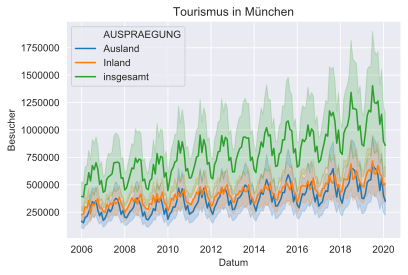

In [84]:
fig, ax1 = plt.subplots()
tidy = df.melt(id_vars='AUSPRAEGUNG').rename(columns=str.title)
ax1 = sns.lineplot(x='MONAT',y='WERT',hue='AUSPRAEGUNG',data=df_clean)
ax1.set(xlabel="Datum",
       ylabel="Besucher",
       title="Tourismus in München")
sns.despine(fig)